# Explore here

It's recommended to use this notebook for exploration purposes.

In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records'
response = requests.get(url)
response.status_code

200

In [ ]:
if response.status_code==200:
  soup = BeautifulSoup(response.content, 'html.parser')
  tablas = pd.read_html(url)
  print(f"Total de tablas encontradas: {len(tablas)}")

  for i, tabla in enumerate(tablas):
    print(f"TABLA {i}")
    print(tabla.head(3))


Total de tablas encontradas: 27
TABLA 0
  Rank                 Song      Artist(s) Streams (billions)  \
0    1    "Blinding Lights"     The Weeknd              4.825   
1    2       "Shape of You"     Ed Sheeran              4.346   
2    3  "Someone You Loved"  Lewis Capaldi              3.893   

       Release date Ref.  
0  29 November 2019  [2]  
1    6 January 2017  [3]  
2   8 November 2018  [4]  
TABLA 1
  Rank      Artist     Top 100            Top 10       3 billion+ streams  \
  Rank      Artist Total songs Lead Feat.   Lead Feat.               Lead   
0    1  Bruno Mars           6    5     1    NaN   NaN                NaN   
1    2  The Weeknd           5    5   NaN      2   NaN                  2   
2    2    Dua Lipa           5    3     2    NaN   NaN                NaN   

        4 billion+ streams        
  Feat.               Lead Feat.  
0   NaN                NaN   NaN  
1   NaN                  1   NaN  
2   NaN                NaN   NaN  
TABLA 2
  No.         

In [ ]:
df = tablas[0]
df = df.dropna()
df['Streams (billions)'] = df['Streams (billions)'].astype(str)
df['Streams (billions)'] = df['Streams (billions)'].str.replace('$', '', regex=False)
df['Streams (billions)'] = df['Streams (billions)'].str.replace('B', '', regex=False)
df['Streams (billions)'] = df['Streams (billions)'].str.strip()
df['Streams (billions)'] = pd.to_numeric(df['Streams (billions)'], errors='coerce').astype(float)
df = df.dropna(subset=['Streams (billions)'])


In [ ]:
#¿Cómo puedo hacer para descargar los csv?
conn = sqlite3.connect('spotify_streams.db') 
df.to_sql('spotify_data', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

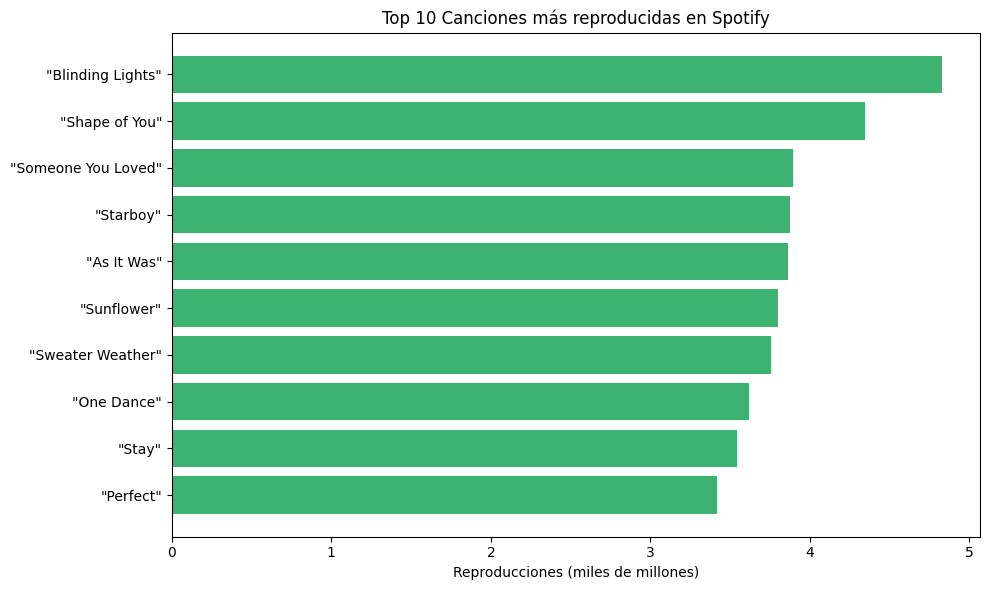

In [ ]:
top10 = df.sort_values(by='Streams (billions)', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['Song'], top10['Streams (billions)'], color='mediumseagreen')
plt.xlabel('Reproducciones (miles de millones)')
plt.title('Top 10 Canciones más reproducidas en Spotify')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

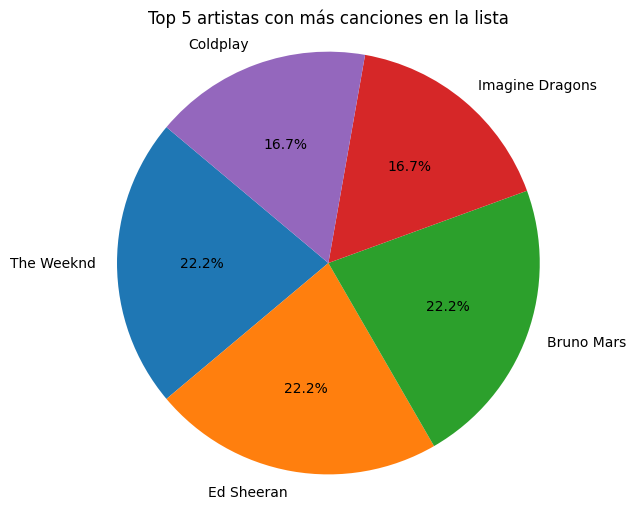

In [ ]:
artistas_top = df['Artist(s)'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(artistas_top, labels=artistas_top.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 artistas con más canciones en la lista')
plt.axis('equal')
plt.show()

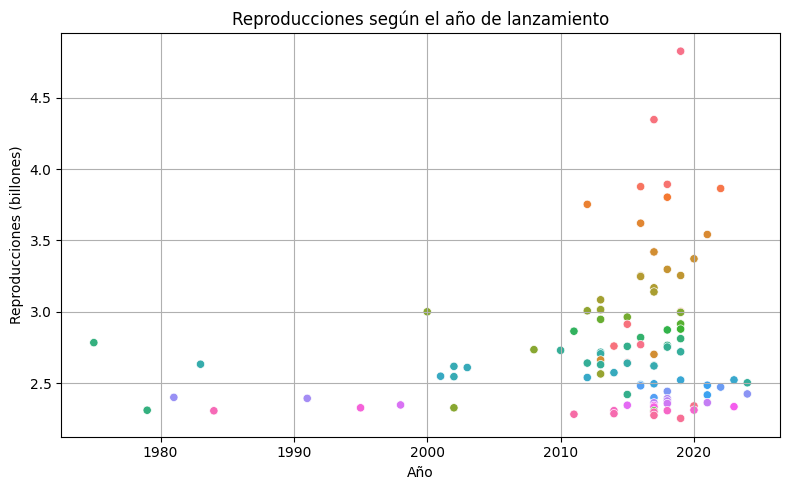

In [ ]:
df['Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Year', y='Streams (billions)', hue='Artist(s)', legend=False)
plt.title('Reproducciones según el año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Reproducciones (billones)')
plt.grid(True)
plt.tight_layout()
plt.show()